In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


/Users/rashedkarim/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [17]:
df_data = pd.read_csv('./data/encirclement/FV_LPV_circ.csv')

In [18]:
df_data.head(2)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar
0,0,7423,40.5998,37.3302,8.15213,0,143.2
1,0,7423,40.5998,37.3302,8.15213,3,143.2


In [54]:
df.loc(0)

NameError: name 'df' is not defined

In [57]:
df_data.iloc[0]['X']

40.599800000000002

In [5]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
df_data['Y'].head(5)

0    1.000000e-10
1    1.000000e-10
2    1.727320e+01
3    1.787240e+01
4    1.711540e+01
Name: Y, dtype: float64

In [10]:
df_data.describe()

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar
count,2391.000000,2391.000000,2.391000e+03,2.391000e+03,2391.000000,2391.000000,2391.000000
mean,70.278126,3787.294437,2.741578e+01,2.539945e+01,-9.459983,1.230029,117.709578
std,40.659264,2717.433411,9.544559e+00,1.503381e+01,13.412695,0.642785,20.873671
min,0.000000,0.000000,1.000000e-10,1.000000e-10,-29.077100,0.000000,-1.000000
25%,35.000000,1149.000000,2.412985e+01,8.311020e+00,-22.689200,1.000000,100.143000
50%,70.000000,3324.000000,2.770150e+01,3.278950e+01,-11.836600,1.000000,112.000000
75%,106.000000,6900.000000,3.174240e+01,3.911260e+01,6.496470,1.000000,135.381000
max,140.000000,8474.000000,5.019410e+01,4.145310e+01,12.875100,3.000000,165.333000


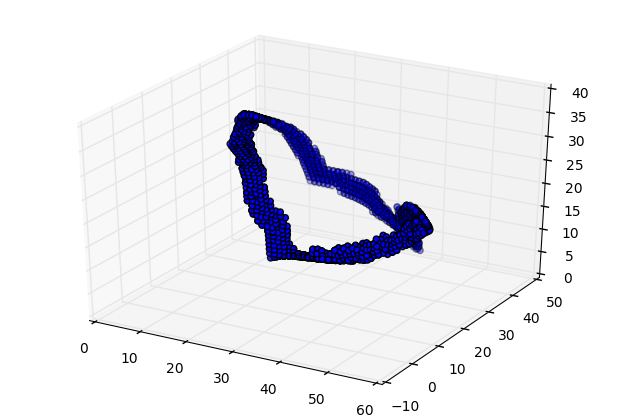

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_data['X'], df_data['Y'], df_data['Z'])
plt.show()

In [20]:
df_data_scalars = pd.concat([df_data['MainVertexSeq'], df_data['MeshScalar']], axis=1)

In [8]:
df_data_scalars.head(5)

,MainVertexSeq,MeshScalar
0,0,143.200
1,0,143.200
2,0,146.000
3,0,148.714
4,0,151.857


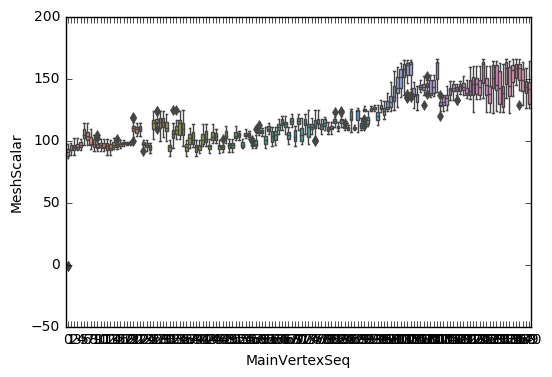

In [28]:
ax = sns.boxplot(x="MainVertexSeq", y="MeshScalar", data=df_data_scalars)

In [29]:
df_data['MainVertexSeq'].nunique()

141

In [30]:
df_data['MainVertexSeq'].describe()

count    2391.000000
mean       70.278126
std        40.659264
min         0.000000
25%        35.000000
50%        70.000000
75%       106.000000
max       140.000000
Name: MainVertexSeq, dtype: float64

In [21]:
g1 = df_data.groupby(['MainVertexSeq']).median()
g1 = g1.reset_index()

In [34]:
g1.head(2)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar
0,0,11.0,-8.07884,8.39902,-42.1362,1.0,175.2
1,1,4997.0,-18.65880,7.50162,-16.9984,1.0,195.5


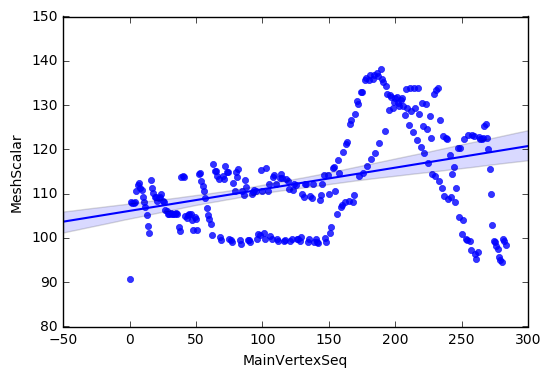

In [16]:
ax = sns.regplot(x="MainVertexSeq", y="MeshScalar", data=g1)

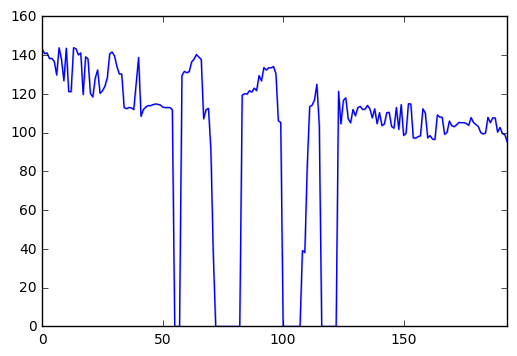

In [25]:
ax = sns.tsplot(data=g1['MeshScalar'])

In [35]:
df_data_SM = pd.read_csv('./data/encirclement/SM_RPV_line.csv')

In [37]:
center_data = [df_data_SM['X'].mean(), df_data_SM['Y'].mean(), df_data_SM['Z'].mean()]

In [52]:
center_data

[-24.731444755295893, 19.927634813732652, 4.468918337691738]

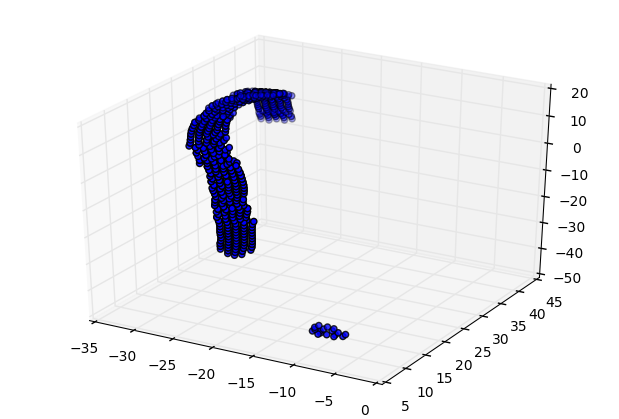

In [51]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_data_SM['X'], df_data_SM['Y'], df_data_SM['Z'])
plt.show()

In [30]:
df_data_scalars = pd.concat([df_data_SM['MainVertexSeq'], df_data_SM['MeshScalar']], axis=1)

In [31]:
g1 = df_data_SM.groupby(['MainVertexSeq']).median()
g1 = g1.reset_index()

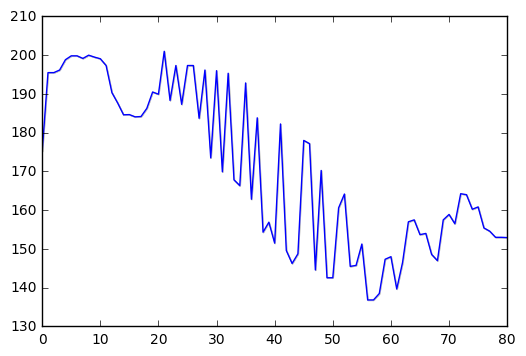

In [32]:
ax = sns.tsplot(data=g1['MeshScalar'])

In [33]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [62]:
def point_theta(center, A):
    thetas = []; 
    Ref_pt = [A.iloc[0]['X'], A.iloc[0]['Y'], A.iloc[0]['Z']] 
    for index, row in A.iterrows():
        pt = [row['X'], row['Y'], row['Z']]
        theta = angle_between(Ref_pt, pt)
        thetas.append(theta)
    return thetas


In [69]:
thetas = point_theta(center_data, df_data)

In [83]:
thetas_df = pd.Series(thetas, name='theta');

In [84]:
df_data_with_theta = pd.concat([df_data, thetas_df], axis=1)

In [77]:
df_data.head(5)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar
0,0,7423,40.5998,37.3302,8.15213,0,143.200
1,0,7423,40.5998,37.3302,8.15213,3,143.200
2,0,7422,41.1864,37.1811,7.78054,2,146.000
3,0,7424,41.0272,36.9187,8.55416,1,148.714
4,0,7166,41.9056,36.8544,7.57050,1,151.857


In [85]:
df_data_with_theta.head(5)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar,theta
0,0,7423,40.5998,37.3302,8.15213,0,143.200,0.000000
1,0,7423,40.5998,37.3302,8.15213,3,143.200,0.000000
2,0,7422,41.1864,37.1811,7.78054,2,146.000,0.011702
3,0,7424,41.0272,36.9187,8.55416,1,148.714,0.012720
4,0,7166,41.9056,36.8544,7.57050,1,151.857,0.024927


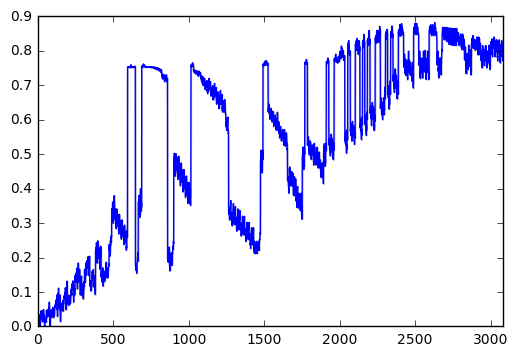

In [87]:
sns.tsplot(df_data_with_theta['theta'])

In [90]:
df_data_with_thetas_sorted = df_data_with_theta.sort_values(by='theta')

In [91]:
df_data_with_thetas_sorted.head(10)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar,theta
0,0,7423,40.5998,37.3302,8.15213,0,143.2,0.000000
1,0,7423,40.5998,37.3302,8.15213,3,143.2,0.000000
46,2,7423,40.5998,37.3302,8.15213,1,143.2,0.000000
82,4,7423,40.5998,37.3302,8.15213,1,143.2,0.000000
15,1,7423,40.5998,37.3302,8.15213,2,143.2,0.000000
2,0,7422,41.1864,37.1811,7.78054,2,146.0,0.011702
45,2,7422,41.1864,37.1811,7.78054,1,146.0,0.011702
16,1,7422,41.1864,37.1811,7.78054,1,146.0,0.011702
47,2,7666,40.2787,37.2163,8.76538,2,141.2,0.011993
55,3,7666,40.2787,37.2163,8.76538,1,141.2,0.011993


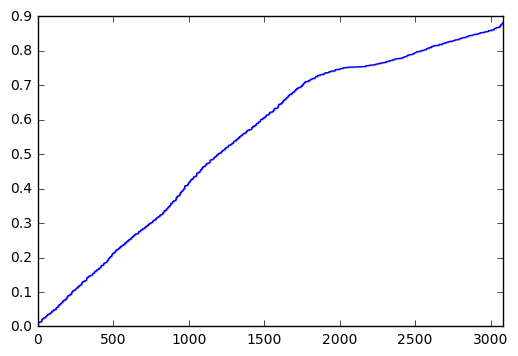

In [92]:
sns.tsplot(df_data_with_thetas_sorted['theta'])

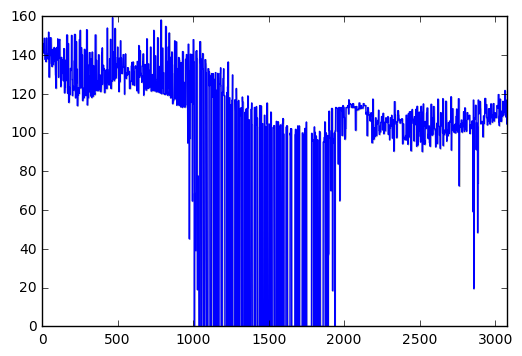

In [93]:
sns.tsplot(df_data_with_thetas_sorted['MeshScalar'])

In [95]:
df_data_with_thetas_sorted.head(15)

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar,theta
0,0,7423,40.5998,37.3302,8.15213,0,143.200,0.000000
1,0,7423,40.5998,37.3302,8.15213,3,143.200,0.000000
46,2,7423,40.5998,37.3302,8.15213,1,143.200,0.000000
82,4,7423,40.5998,37.3302,8.15213,1,143.200,0.000000
15,1,7423,40.5998,37.3302,8.15213,2,143.200,0.000000
2,0,7422,41.1864,37.1811,7.78054,2,146.000,0.011702
45,2,7422,41.1864,37.1811,7.78054,1,146.000,0.011702
16,1,7422,41.1864,37.1811,7.78054,1,146.000,0.011702
47,2,7666,40.2787,37.2163,8.76538,2,141.200,0.011993
55,3,7666,40.2787,37.2163,8.76538,1,141.200,0.011993


In [100]:
df_data_with_thetas_sorted_nodupes = df_data_with_thetas_sorted.drop_duplicates(subset='VertexID', keep='last');

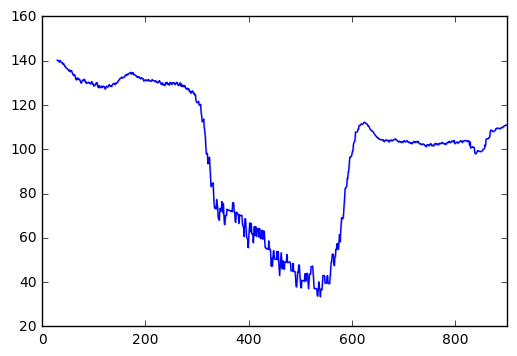

In [109]:
sns.tsplot(pd.rolling_mean(df_data_with_thetas_sorted_nodupes['MeshScalar'],30))

In [103]:
df_data_with_thetas_sorted_nodupes.describe()

,MainVertexSeq,VertexID,X,Y,Z,VertexDepth,MeshScalar,theta
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,98.925721,11431.225055,31.047602,22.658215,21.563771,1.169623,99.091267,0.536583
std,57.940955,2646.952318,13.913018,14.606958,7.464635,0.529955,44.051022,0.268526
min,0.000000,6900.000000,7.444900,0.350307,6.384720,0.000000,0.000000,0.000000
25%,43.000000,9648.250000,17.252125,7.224602,16.815375,1.000000,99.425000,0.297986
50%,104.000000,10376.000000,31.039150,25.383750,19.280850,1.000000,110.646000,0.601601
75%,150.000000,13926.750000,43.296475,36.931925,28.796975,1.000000,125.299750,0.772538
max,193.000000,16541.000000,52.886900,41.616700,34.682400,3.000000,159.429000,0.882249
